In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

display(
    train_df.head(2),
    test_df.head(2),
    
    train_df.shape,
    test_df.shape
)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


(614, 13)

(367, 12)

In [4]:
# explore the target column

In [5]:
train_df['Loan_Status'].unique()
# so this is a classification problem

array(['Y', 'N'], dtype=object)

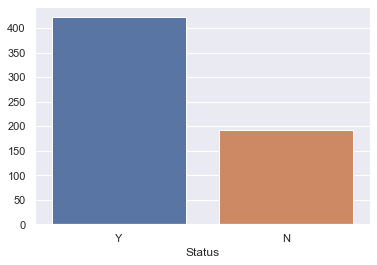

In [6]:
sns.set()
ax = sns.countplot(x='Loan_Status', data=train_df)
ax.set(xlabel="Status", ylabel="");

In [7]:
# concat the train & test columns to perform data cleaning

In [8]:
train_df.iloc[ : , : -1].head(2) # this removes the loan status column (target column) 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural


In [9]:
df = pd.concat([train_df.iloc[ : , : -1], test_df], axis = 0)
df.head(2) 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural


In [10]:
df.shape

(981, 12)

In [11]:
df.dtypes  

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [12]:
# treating categorical variables by one hot encoding & label encoding in order to find the correlation
# with other columns that would help in handling the null values better

In [13]:
def display_col(df, col):
    display(
        df[col].unique(),
        df[col].isnull().sum()
    )
# creating a function to be applied on object datatype columns

In [14]:
# education
display_col(df, 'Education')

array(['Graduate', 'Not Graduate'], dtype=object)

0

In [15]:
df['Education'] = df['Education'].apply(lambda x: 1 if x=='Graduate' else 0)
display_col(df, 'Education') 

array([1, 0])

0

In [16]:
# gender
display_col(df, 'Gender')

array(['Male', 'Female', nan], dtype=object)

24

In [17]:
df['Gender'] = df['Gender'].apply(lambda x: 1 if x=='Male' else 0 if x=="Female" else x)
display_col(df, 'Gender') 

array([ 1.,  0., nan])

24

In [18]:
# married
display_col(df, 'Married')

array(['No', 'Yes', nan], dtype=object)

3

In [19]:
df['Married'] = df['Married'].apply(lambda x: 1 if x=='Yes' else 0 if x=="No" else x)
display_col(df, 'Married')

array([ 0.,  1., nan])

3

In [20]:
# property
display_col(df, 'Property_Area')

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

0

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
  
df['Property_Area']= le.fit_transform(df['Property_Area']) 
display_col(df, 'Property_Area')

array([2, 0, 1])

0

In [22]:
# self employed
display_col(df, 'Self_Employed')

array(['No', 'Yes', nan], dtype=object)

55

In [23]:
df['Self_Employed'] = df['Self_Employed'].apply(lambda x: 1 if x=='Yes' else 0 if x=="No" else x)
display_col(df, 'Self_Employed')

array([ 0.,  1., nan])

55

In [24]:
# dependents
display_col(df, 'Dependents')

array(['0', '1', '2', '3+', nan], dtype=object)

25

In [25]:
df['Dependents'].fillna(value = 5, inplace=True) # for now only
df['Dependents'] = df['Dependents'].apply(lambda x: 4 if x=='3+' else x)

df['Dependents'] = df['Dependents'].astype(int) # converting from string to int
df.replace(5, np.nan, inplace=True) # converting back to NaN
display_col(df, 'Dependents')

array([ 0.,  1.,  2.,  4., nan])

25

In [26]:
df.dtypes

Loan_ID               object
Gender               float64
Married              float64
Dependents           float64
Education              int64
Self_Employed        float64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
dtype: object

In [27]:
# null values

In [28]:
df.isna().sum()

Loan_ID               0
Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

In [29]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Gender,1.000000,0.337228,0.135016,-0.041657,0.020697,0.057489,0.083596,0.097381,-0.071036,0.024921,-0.019648
Married,0.337228,1.000000,0.324423,-0.027459,0.013733,0.051781,0.062812,0.158438,-0.049497,0.021840,0.005586
Dependents,0.135016,0.324423,1.000000,-0.087888,0.024445,0.137312,-0.003256,0.149180,-0.087145,-0.057913,0.024002
Education,-0.041657,-0.027459,-0.087888,1.000000,0.011429,0.138909,0.060380,0.165053,0.024396,0.066182,0.050685
Self_Employed,0.020697,0.013733,0.024445,0.011429,1.000000,0.123286,-0.016308,0.114708,-0.034812,0.035852,-0.062292
ApplicantIncome,0.057489,0.051781,0.137312,0.138909,0.123286,1.000000,-0.114247,0.551811,-0.023089,0.023378,0.005513
CoapplicantIncome,0.083596,0.062812,-0.003256,0.060380,-0.016308,-0.114247,1.000000,0.179228,-0.043860,-0.027253,-0.024921
LoanAmount,0.097381,0.158438,0.149180,0.165053,0.114708,0.551811,0.179228,1.000000,0.055636,-0.008235,-0.036217
Loan_Amount_Term,-0.071036,-0.049497,-0.087145,0.024396,-0.034812,-0.023089,-0.043860,0.055636,1.000000,-0.020439,-0.042744
Credit_History,0.024921,0.021840,-0.057913,0.066182,0.035852,0.023378,-0.027253,-0.008235,-0.020439,1.000000,0.023261


In [30]:
# handle null values

In [31]:
# gender => we start with gender bcoz gender is not correlated to anything
df['Gender'].value_counts(normalize=True)*100

1.0    80.982236
0.0    19.017764
Name: Gender, dtype: float64

In [32]:
df['Gender'].fillna(value = int(df['Gender'].mode()), inplace=True) # replacing with mode value
df['Gender'] = df['Gender'].astype(int)
df['Gender'].isnull().sum() 

0

In [33]:
# married => since only 3 nan values so treating with mode
df['Married'].value_counts()

1.0    631
0.0    347
Name: Married, dtype: int64

In [34]:
df['Married'].fillna(value = int(df['Married'].mode()), inplace=True) # replacing with mode value
df['Married'] = df['Married'].astype(int)
df['Married'].isnull().sum()

0

In [35]:
# self employed => exploring self employed with education & gender
df['Self_Employed'].value_counts()

0.0    807
1.0    119
Name: Self_Employed, dtype: int64

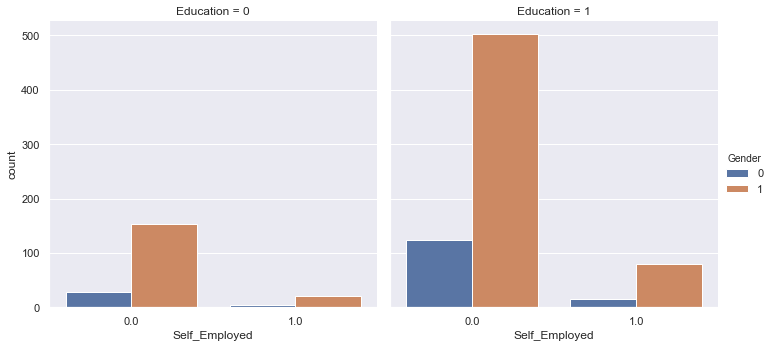

In [36]:
sns.catplot(x='Self_Employed', hue='Gender', col='Education', kind='count', data=df);

In [37]:
# as we can see that mostly when a human is male & graduate then self employment is No
def null_se(cols):
    Self_Employed = cols[0]
    Gender = cols[1]
    Education = cols[2]
    
    if pd.isnull(Self_Employed):
        if Gender==1 or Education==1:
            return 0.0
        else:
            return 1.0
    else:
        return Self_Employed
    
df['Self_Employed'] = df[['Self_Employed', 'Gender', 'Education']].apply(null_se, axis=1)
df['Self_Employed'].isna().sum()

0

In [38]:
df['Self_Employed'] = df['Self_Employed'].astype(int)
df['Self_Employed'].value_counts()

0    860
1    121
Name: Self_Employed, dtype: int64

In [39]:
# dependents => as we can see dependents is highly correlated to marriage
df['Dependents'].value_counts()

0.0    545
2.0    160
1.0    160
4.0     91
Name: Dependents, dtype: int64

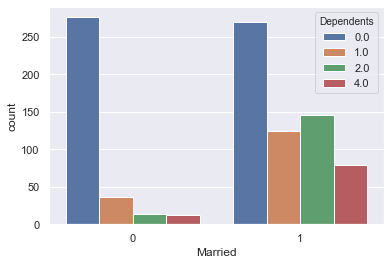

In [40]:
sns.countplot(x='Married', hue='Dependents', data=df);

In [41]:
df['Dependents'].fillna(value = int(df['Dependents'].mode()), inplace=True) # replacing with mode
df['Dependents'] = df['Dependents'].astype(int)
df['Dependents'].isnull().sum()

0

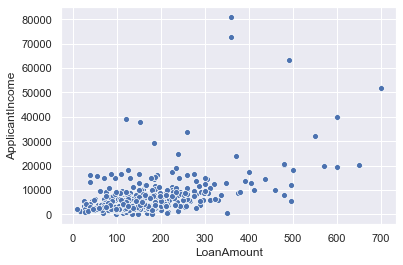

In [42]:
# loan amount => highly correlated to Applicant Income
sns.scatterplot(x='LoanAmount', y='ApplicantIncome', data=df);

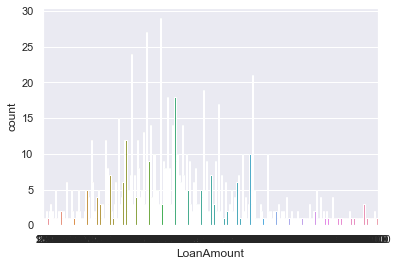

In [43]:
sns.countplot('LoanAmount', data=df);

In [44]:
df['LoanAmount'].describe()

count    954.000000
mean     142.511530
std       77.421743
min        9.000000
25%      100.000000
50%      126.000000
75%      162.000000
max      700.000000
Name: LoanAmount, dtype: float64

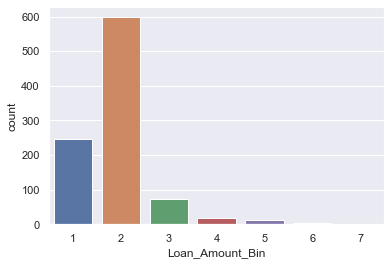

In [45]:
binss = [9, 101, 201, 301, 401, 501, 601, 701] # binning
label = [1,2,3,4,5,6,7]

df['Loan_Amount_Bin'] = pd.cut(df['LoanAmount'], bins=binss, labels=label)
sns.countplot('Loan_Amount_Bin', data=df);

In [46]:
# so most of the values occur between 100-200
df['LoanAmount'].fillna(150, inplace=True) # replacing with middle value of Bin 2
df.drop('Loan_Amount_Bin', axis=1, inplace=True)

df['LoanAmount'] = df['LoanAmount'].astype(int)
df['LoanAmount'].isnull().sum()

0

In [47]:
# loan amount term
df['Loan_Amount_Term'].value_counts() # basically given in months

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

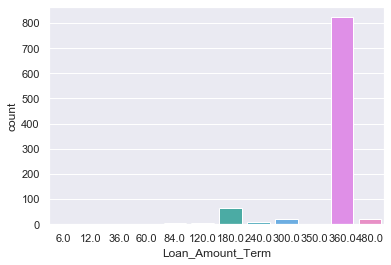

In [48]:
sns.countplot('Loan_Amount_Term', data=df);

In [49]:
df['Loan_Amount_Term'].describe()

count    961.000000
mean     342.201873
std       65.100602
min        6.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

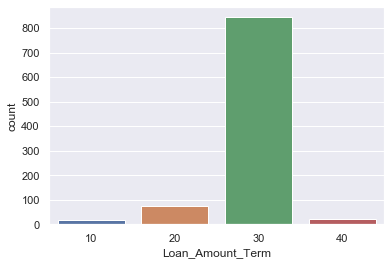

In [50]:
binss = [6, 121, 241, 361, 481] # taking bins per 10 years approx
label = [10,20,30,40]

df['Loan_Amount_Term'] = pd.cut(df['Loan_Amount_Term'], bins=binss, labels=label)
sns.countplot('Loan_Amount_Term', data=df);

In [51]:
df['Loan_Amount_Term'].fillna(30, inplace=True)
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].astype(int)
df['Loan_Amount_Term'].isna().sum()

0

In [52]:
# credit history => shoulb be dependent on the income and loan amount (bin)
df['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

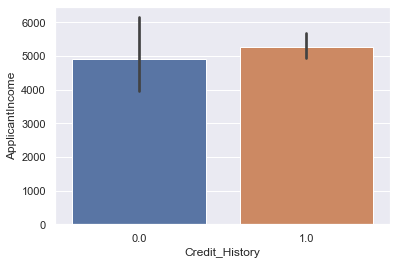

In [53]:
sns.barplot(y='ApplicantIncome',  x='Credit_History', data=df);

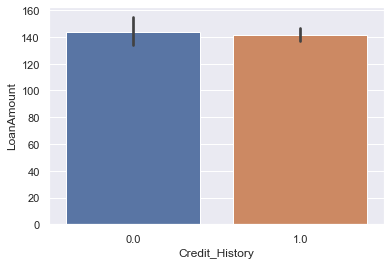

In [54]:
sns.barplot(y='LoanAmount',  x='Credit_History', data=df);

In [55]:
# cant find out much difference from the graph so taking mode
df['Credit_History'].fillna(int(df['Married'].mode()), inplace=True)
df['Credit_History'] = df['Credit_History'].astype(int)
df['Credit_History'].isnull().sum()

0

In [56]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [57]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,1,0,0,1,0,5849,0.0,150,30,1,2
1,LP001003,1,1,1,1,0,4583,1508.0,128,30,1,0


In [58]:
# outliers

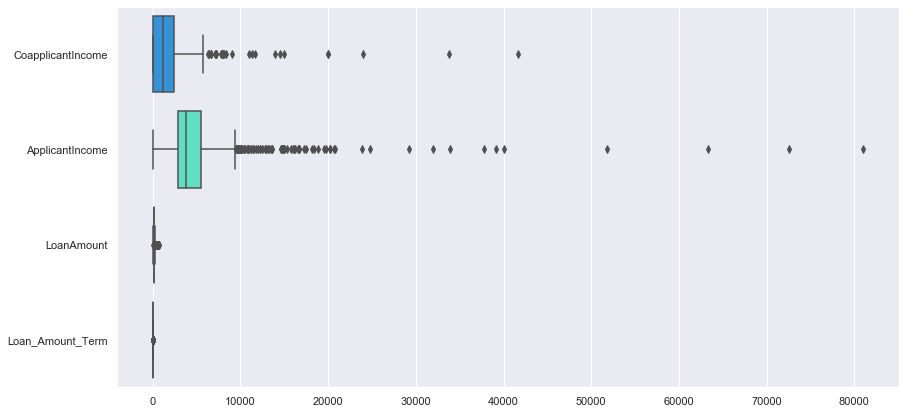

In [59]:
fig = plt.figure(figsize =(14,7)) 
sns.boxplot(data=df[['CoapplicantIncome', 'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term']], 
            palette='rainbow', orient='h'); # outliers for continuous variables

In [60]:
def outlier(df, col):
    q3 = df[col].describe()['75%']
    q1 = df[col].describe()['25%']
    iqr = q3-q1
    maxx = q3 + (1.5*iqr)
    minn = q1 - (1.5*iqr)
    df[col] = df[col].apply(lambda x: q3 if x>=maxx else q1 if x<=minn else x)

In [61]:
cols = ['CoapplicantIncome', 'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

for col in cols:
    outlier(df, col) 

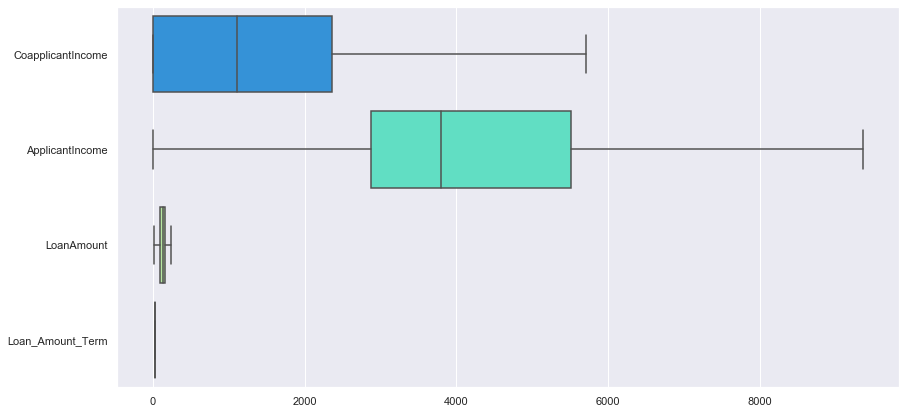

In [62]:
fig = plt.figure(figsize =(14,7)) 
sns.boxplot(data=df[['CoapplicantIncome', 'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term']], 
            palette='rainbow', orient='h');

In [63]:
# segregate the data

In [64]:
train_df.shape

(614, 13)

In [65]:
train = df[:614]
test = df[614:]

In [66]:
# adding the target column back to training data & label encoding it

In [98]:
train['Loan_Status'] = train_df['Loan_Status']
train['Loan_Status']= le.fit_transform(train['Loan_Status']) # label encoding
train.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849.0,0.0,150.0,30.0,1,2,1
1,LP001003,1,1,1,1,0,4583.0,1508.0,128.0,30.0,1,0,0


In [69]:
train.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.165877,-0.045364,-0.020587,0.102220,0.202779,0.158100,NaN,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.308408,-0.012304,0.001395,0.010084,0.237680,0.179890,NaN,0.010938,0.004257,0.091478
Dependents,0.165877,0.308408,1.000000,-0.059001,0.052803,0.126343,-0.066462,0.108171,NaN,-0.047203,-0.012006,0.002474
Education,-0.045364,-0.012304,-0.059001,1.000000,-0.007662,0.171441,0.028950,0.131740,NaN,0.073658,0.065243,0.085884
Self_Employed,-0.020587,0.001395,0.052803,-0.007662,1.000000,0.181769,-0.042002,0.100278,NaN,0.002368,-0.030999,0.002731
ApplicantIncome,0.102220,0.010084,0.126343,0.171441,0.181769,1.000000,-0.221103,0.443480,NaN,0.027668,-0.073733,0.006849
CoapplicantIncome,0.202779,0.237680,-0.066462,0.028950,-0.042002,-0.221103,1.000000,0.243542,NaN,0.002298,-0.094541,0.032816
LoanAmount,0.158100,0.179890,0.108171,0.131740,0.100278,0.443480,0.243542,1.000000,NaN,-0.013078,-0.100170,-0.046331
Loan_Amount_Term,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit_History,0.009170,0.010938,-0.047203,0.073658,0.002368,0.027668,0.002298,-0.013078,NaN,1.000000,0.001963,0.540556


In [70]:
X = train.drop(['Loan_ID', 'Loan_Status'], axis=1) # features
y = train['Loan_Status']                           # label

In [99]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

In [72]:
# make an instance & provide the value for k

In [73]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn

print(sorted(sklearn.neighbors.VALID_METRICS['brute']))

clf = KNeighborsClassifier(n_neighbors=15, metric='euclidean')
clf.fit(X_train, y_train)
pred = clf.predict(X_test) 

['braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation', 'cosine', 'cosine', 'dice', 'euclidean', 'hamming', 'haversine', 'jaccard', 'kulsinski', 'l1', 'l2', 'mahalanobis', 'manhattan', 'matching', 'minkowski', 'precomputed', 'rogerstanimoto', 'russellrao', 'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean', 'wminkowski', 'yule']


In [74]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('Accuracy Score: ', round(accuracy_score(y_test, pred)*100,2)) 
print('\n')
print('Classification Report: ', '\n', '\n', classification_report(y_test, pred))
print('\n')
print('Confusion Matrix: ', '\n', confusion_matrix(y_test, pred))

Accuracy Score:  64.86


Classification Report:  
 
               precision    recall  f1-score   support

           0       0.47      0.14      0.22        64
           1       0.67      0.92      0.77       121

    accuracy                           0.65       185
   macro avg       0.57      0.53      0.50       185
weighted avg       0.60      0.65      0.58       185



Confusion Matrix:  
 [[  9  55]
 [ 10 111]]


In [75]:
# probability score

In [76]:
prob = clf.predict_proba(X_test)

df_prob = pd.DataFrame(prob, columns=clf.classes_, index=X_test.index)
df_prob.head()

,0,1
366,0.533333,0.466667
325,0.200000,0.800000
515,0.400000,0.600000
296,0.266667,0.733333
227,0.400000,0.600000


In [77]:
# check for overfitting

In [78]:
train_pred = clf.predict(X_train)

In [79]:
print('Accuracy Score: ', round(accuracy_score(y_train, train_pred)*100,2)) 
print('\n')
print('Classification Report: ', '\n', '\n', classification_report(y_train, train_pred))

# so our model can be considered as good

Accuracy Score:  73.19


Classification Report:  
 
               precision    recall  f1-score   support

           0       0.64      0.23      0.34       128
           1       0.74      0.94      0.83       301

    accuracy                           0.73       429
   macro avg       0.69      0.59      0.59       429
weighted avg       0.71      0.73      0.69       429



In [80]:
# create a dataframe showing the actual values, predicted value for X_test data 
# & check where the predicted result didn't match

In [81]:
pred_df = pd.DataFrame(X_test)
pred_df['y_test'], pred_df['pred'] = y_test, pred
# pred_df['proba_2'], pred_df['proba_4'] = df_prob[2], df_prob[4] 
pred_df.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,y_test,pred
366,1,0,0,1,0,2500.0,0.0,96.0,30.0,1,1,0,0
325,1,1,1,1,1,8666.0,4983.0,160.0,30.0,0,0,0,1


In [82]:
pred_df[pred_df['y_test'] != pred_df['pred']].index

Int64Index([325, 503, 538,  42, 191, 400, 403, 452, 218, 152, 351, 210, 258,
            513, 405, 369, 307, 404,  63, 591, 396, 473, 208, 272, 450, 408,
            280,  13, 139, 494,  48, 108, 308, 587, 546, 150,  22, 284, 431,
            299, 192,  31, 319, 567,  45, 340,  54, 133,  83, 514, 574, 225,
             20,  18,  82,  95, 291, 506, 416, 300, 457, 597, 259,  36, 414],
           dtype='int64')

In [83]:
# find the value of k using grid search

In [84]:
param_grid = {'n_neighbors': [3,5,7,9,11,13,15,27,19,21,23,25,27,29,31],
#               'metric': ['manhattan','euclidean']}
             }

In [96]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=10)
grid.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 27, 19, 21, 23,
                                         25, 27, 29, 31]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [86]:
display (
    grid.best_params_,
    grid.best_score_,
    grid.best_estimator_
)

{'n_neighbors': 21}

0.703962703962704

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [89]:
grid_pred = grid.predict(X_test)

In [90]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('Accuracy Score: ', round(accuracy_score(y_test, grid_pred)*100,2)) 
print('\n')
print('Classification Report: ', '\n', '\n', classification_report(y_test, grid_pred))
print('\n')
print('Confusion Matrix: ', '\n', confusion_matrix(y_test, grid_pred))

Accuracy Score:  65.41


Classification Report:  
 
               precision    recall  f1-score   support

           0       0.50      0.03      0.06        64
           1       0.66      0.98      0.79       121

    accuracy                           0.65       185
   macro avg       0.58      0.51      0.42       185
weighted avg       0.60      0.65      0.54       185



Confusion Matrix:  
 [[  2  62]
 [  2 119]]


In [91]:
# prediction on actual test data

In [92]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [93]:
knn.fit(X, y)
pred = knn.predict(test.iloc[ : , 1: ])

In [94]:
test['pred'] = pred
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,pred
0,LP001015,1,1,0,1,0,5720.0,0.0,110.0,30.0,1,2,1
1,LP001022,1,1,1,1,0,3076.0,1500.0,126.0,30.0,1,2,1
2,LP001031,1,1,2,1,0,5000.0,1800.0,208.0,30.0,1,2,1
3,LP001035,1,1,2,1,0,2340.0,2546.0,100.0,30.0,1,2,1
4,LP001051,1,0,0,0,0,3276.0,0.0,78.0,30.0,1,2,1
